# 0. Imports

In [15]:
!pip install pandas
!pip install numpy
!pip install scikit-learn
!pip install python-dotenv
!pip install matplotlib

In [16]:
import pandas as pd
import numpy as np

from dotenv import load_dotenv
load_dotenv()
import os

from sklearn.model_selection import train_test_split

In [17]:
target_col = 'expensive'

# 1. Lendo base

In [18]:
path_raw = os.getenv('PATH_TO_SPLIT')
df = pd.read_csv(r'C:\Users\davim\interp-conf-ml\data\to_split.csv', sep=',')
# df = pd.read_csv(path_raw, sep=',')

In [19]:
df = df.drop(df.columns[0], axis=1)

In [20]:
df.sample(1)

,find_condominio,find_iptu,find_m_quadrado,is_academia,is_apertamento,is_churrasqueira,is_elevador,is_mobiliado,is_piscina,is_portaria,is_salao_festa,is_varanda,n_banheiros,n_garagens,n_quartos,expensive,Bairro
16885,0.0,0.0,70.0,0,1,0,0,0,0,0,0,0,1,1,3,1,Caxangá


# 2. Dividindo entre treino e teste

In [25]:
df_1 = df.copy() 

In [27]:
df_1['Bairro'] = df_1['Bairro'].astype('category')
df_1['Bairro'] = df_1['Bairro'].cat.codes

In [28]:
X = df_1.drop(columns=[target_col])
y = df_1[target_col]

# Separando os dados em treinamento(75%) e teste(25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y)

# 3. Treinamento

## Decision Tree

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 144 candidates, totalling 720 fits


In [73]:
dt = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_leaf=500)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=500, random_state=42)

In [75]:
help(accuracy_score)

Help on function accuracy_score in module sklearn.metrics._classification:

accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)
    Accuracy classification score.
    
    In multilabel classification, this function computes subset accuracy:
    the set of labels predicted for a sample must *exactly* match the
    corresponding set of labels in y_true.
    
    Read more in the :ref:`User Guide <accuracy_score>`.
    
    Parameters
    ----------
    y_true : 1d array-like, or label indicator array / sparse matrix
        Ground truth (correct) labels.
    
    y_pred : 1d array-like, or label indicator array / sparse matrix
        Predicted labels, as returned by a classifier.
    
    normalize : bool, default=True
        If ``False``, return the number of correctly classified samples.
        Otherwise, return the fraction of correctly classified samples.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Sample weights.
    
    Ret

In [74]:
accuracy_score(dt.predict(X_test), y_test)

0.81125

[Text(0.5, 0.8333333333333334, 'find_m_quadrado <= 53.5\ngini = 0.478\nsamples = 16000\nvalue = [6330, 9670]'),
 Text(0.25, 0.5, 'find_m_quadrado <= 46.5\ngini = 0.395\nsamples = 5694\nvalue = [4152.0, 1542.0]'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'gini = 0.302\nsamples = 3890\nvalue = [3168, 722]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.496\nsamples = 1804\nvalue = [984.0, 820.0]'),
 Text(0.75, 0.5, 'n_garagens <= 1.5\ngini = 0.333\nsamples = 10306\nvalue = [2178, 8128]'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'gini = 0.42\nsamples = 6679\nvalue = [2002, 4677]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.092\nsamples = 3627\nvalue = [176, 3451]')]

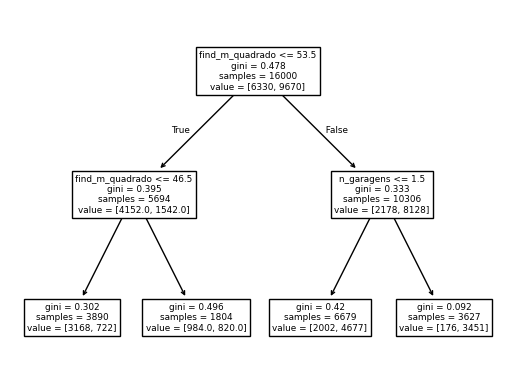

In [72]:
from sklearn.tree import plot_tree
plot_tree(dt, feature_names=list(X_train.columns))

In [30]:
# from sklearn.tree import plot_tree
# plot_tree(best_model, feature_names=list(X_train.columns))

Accuracy: 0.88


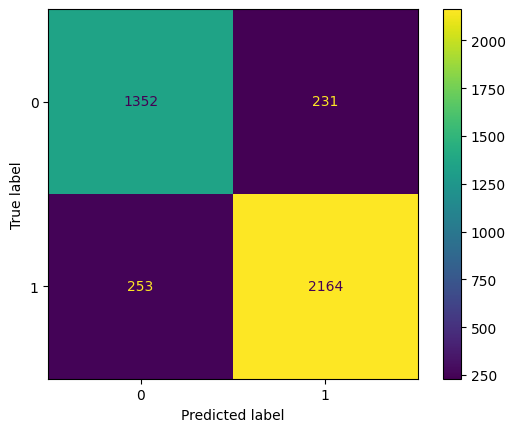

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1583
           1       0.90      0.90      0.90      2417

    accuracy                           0.88      4000
   macro avg       0.87      0.87      0.87      4000
weighted avg       0.88      0.88      0.88      4000



In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Show the plot
plt.show()

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

[Text(0.49896494547526044, 0.9814814814814815, 'x[2] <= 53.5\ngini = 0.478\nsamples = 16000\nvalue = [6330, 9670]'),
 Text(0.19923711016895326, 0.9444444444444444, 'x[2] <= 46.5\ngini = 0.395\nsamples = 5694\nvalue = [4152.0, 1542.0]'),
 Text(0.34910102782210684, 0.962962962962963, 'True  '),
 Text(0.11475899549034553, 0.9074074074074074, 'x[15] <= 9.5\ngini = 0.302\nsamples = 3890\nvalue = [3168, 722]'),
 Text(0.057442517784552845, 0.8703703703703703, 'x[2] <= 40.5\ngini = 0.401\nsamples = 1670\nvalue = [1206, 464]'),
 Text(0.024437881097560975, 0.8333333333333334, 'x[2] <= 29.5\ngini = 0.276\nsamples = 1327\nvalue = [1108, 219]'),
 Text(0.008130081300813009, 0.7962962962962963, 'x[13] <= 1.5\ngini = 0.081\nsamples = 570\nvalue = [546, 24]'),
 Text(0.007113821138211382, 0.7592592592592593, 'x[2] <= 13.5\ngini = 0.052\nsamples = 561\nvalue = [546, 15]'),
 Text(0.006097560975609756, 0.7222222222222222, 'gini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(0.008130081300813009, 0.7222222222

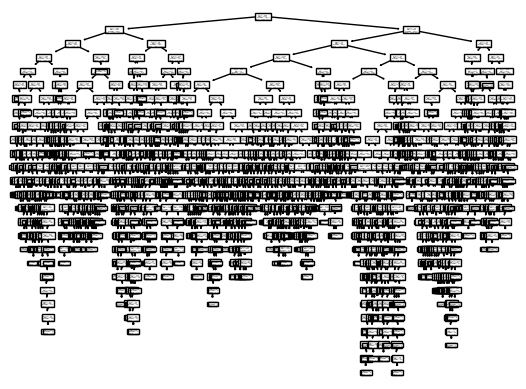

In [64]:
from sklearn.tree import plot_tree

plot_tree(best_model)

## Random forest

In [57]:
from sklearn.ensemble import RandomForestClassifier
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None, monotonic_cst=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  Trees in the forest use the best split strategy, i.e. equivalent to passing
 |  `splitter="best"` to the underlying :class:`~sklearn.tree.DecisionTreeRegressor`.
 |  The sub-sample size is controlled with the `max_samples` paramete

In [32]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier().fit(X_train, y_train)

In [33]:
y_pred = rf.predict(X_test)

Accuracy: 0.90


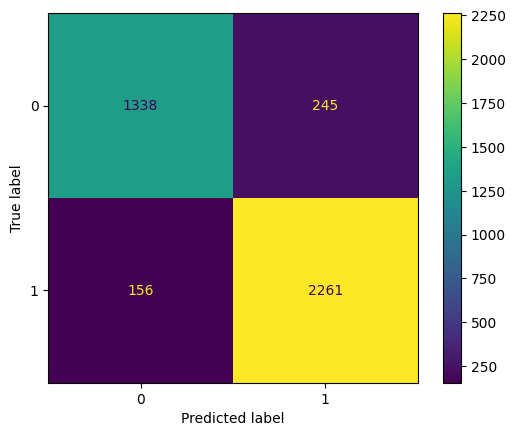

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.85      0.87      1583
           1       0.90      0.94      0.92      2417

    accuracy                           0.90      4000
   macro avg       0.90      0.89      0.89      4000
weighted avg       0.90      0.90      0.90      4000



In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Show the plot
plt.show()

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

### logist regression

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# lr = make_pipeline(StandardScaler(), LogisticRegression())

lr = LogisticRegression(max_iter = 20000)

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

Accuracy: 0.78


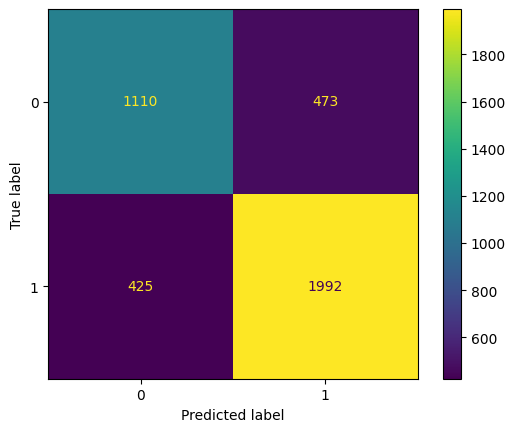

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.70      0.71      1583
           1       0.81      0.82      0.82      2417

    accuracy                           0.78      4000
   macro avg       0.77      0.76      0.76      4000
weighted avg       0.77      0.78      0.77      4000



In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Show the plot
plt.show()

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

### MLP

In [37]:
# from sklearn.neural_network import MLPClassifier
# from sklearn.model_selection import GridSearchCV

# mlp = MLPClassifier()
# #y_pred = mlp.predict(X_test)

# param_grid = {
#     'hidden_layer_sizes': [(128, 128,64),(128, 64)],
#     'activation': ['relu', 'tanh'],
#     'solver': ['adam', 'sgd'],
#     'alpha': [0.0001, 0.001],
# }

# # Perform grid search with cross-validation
# grid_search = GridSearchCV(mlp, param_grid, cv=5, n_jobs=-1)
# grid_search.fit(X_train, y_train)
# mlp = grid_search.best_estimator_

In [38]:
# from sklearn.neural_network import MLPClassifier
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# import matplotlib.pyplot as plt

# # Compute the confusion matrix
# cm = confusion_matrix(y_test, y_pred)

# # Display the confusion matrix
# disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# disp.plot()

# # Show the plot
# plt.show()

In [39]:

# # Print the loss curve
# plt.plot(mlp.loss_curve_)
# plt.title('Loss Curve')
# plt.xlabel('Iterations')
# plt.ylabel('Loss')
# plt.show()

# # Print training statistics
# print("Training statistics:")
# print(f"Number of iterations: {mlp.n_iter_}")
# print(f"Number of layers: {mlp.n_layers_}")
# print(f"Number of outputs: {mlp.n_outputs_}")
# print(f"Activation function: {mlp.activation}")
# print(f"Learning rate: {mlp.learning_rate}")

# # Print training accuracy
# train_accuracy = mlp.score(X_train, y_train)
# print(f"Training Accuracy: {train_accuracy:.2f}")

## Analise Random FLorest

Primeiro devemos notar que a acuracia top2 do random florest, nosso melhor modelo, foi de 0,55 o que, intuitivamente, parece baixo. Uma valor top2 quer dizer que é considerado correto a isntancia que estiver com maior ou segundo maior score, dado pelo modelo. Ou seja, uma variação de 100 mil reais! Acho que um ser humano, com menor numero de features, é capaz de acertar com mais precisão

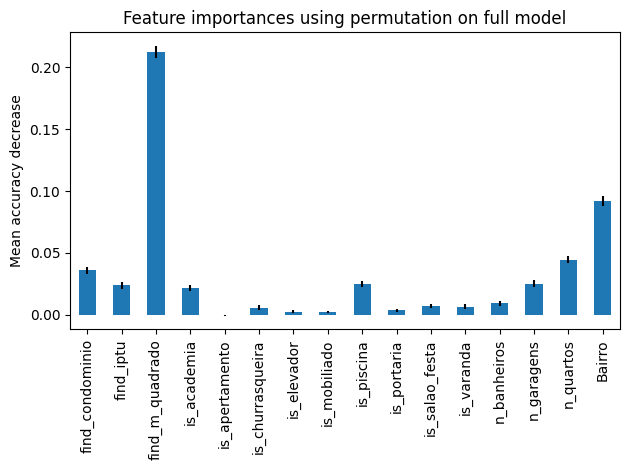

In [40]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

result = permutation_importance(rf, X_test, y_test ,n_repeats=100, random_state=0)

forest_importances = pd.Series(result.importances_mean, index=X.columns)

fig, ax = plt.subplots()

forest_importances.plot.bar(yerr=result.importances_std, ax=ax)

ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

Podemos ver algums comportamentos esperados, como a alta correlação de m^2 e o bairro.

A correlação com bairro é interesante, ja que é uma coluna categorica, devemos ver se o modelo aprendeu bem a separar os bairros

Temos 87 bairros:

In [41]:
X_test['Bairro'].describe()

count    4000.000000
mean       30.303750
std        23.439322
min         0.000000
25%         9.000000
50%        21.000000
75%        48.000000
max        78.000000
Name: Bairro, dtype: float64

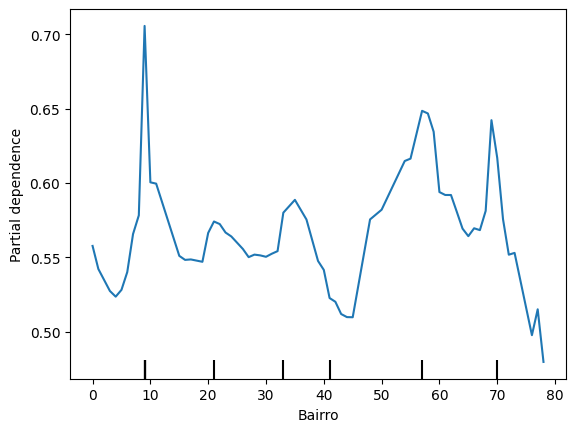

In [42]:
from sklearn.inspection import PartialDependenceDisplay

display  = PartialDependenceDisplay.from_estimator(rf, X_test, [15])

Acredito que esse modelo aprendeu bem a separar um bairro do outro, ja que vemos rapidas mudanças de um para o outro e nenhum sentido crescente ou decrecente.

Quer dizer, alguns bairros ajudam mais que outros a definir o preço do lugar, alguns bairros apresentam muitas residencias caras, enquanto outros, so apresentam residencias baratas. Além disso, alguns são heterogeneos em sua composição e por isso, interferem menos na acuracia

Não tem muita surpresa que metro quadrado é uma feature importante, mas ela parece ser disparado a mais importante

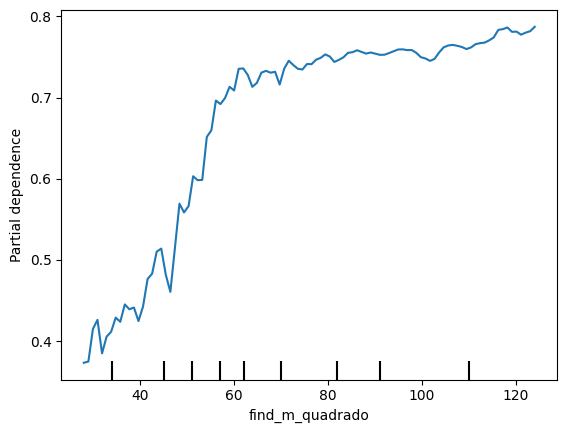

In [43]:
from sklearn.inspection import PartialDependenceDisplay

display  = PartialDependenceDisplay.from_estimator(rf, X_test, [2])

Vemos uma parte baixa no grafico, do inicio até 50 .Quer dizer que quando o metro quadrado é baixo, isso não ajuda muito a saber se o apartamento é caro, provavelmente por que outros fatores, como localização, se tornam bem mais importantes. Enquanto se um apartamento tem mais de 60 m^2 ele definitivamente é caro

o fato do metro quadrado ser tão importante, parece ter diminuido a importancia de features que claramente deveria ajudar como condominio e IPTU

### podemos fazer uma analise aqui sobre a parte mais dificil do dataset, entre 0 metros quadrados e 50

In [44]:
pequena_casa_df =  pd.concat([X_test, y_test], axis=1)
pequena_casa_df = df_1[df_1['find_m_quadrado'] < 50]

In [45]:
X_pequeno = pequena_casa_df.drop(columns=[target_col])
y_pequeno = pequena_casa_df[target_col]

In [46]:
X_pequeno['find_m_quadrado'].describe()

count    5475.000000
mean       37.182283
std         8.562842
min         5.000000
25%        30.000000
50%        37.000000
75%        45.000000
max        49.000000
Name: find_m_quadrado, dtype: float64

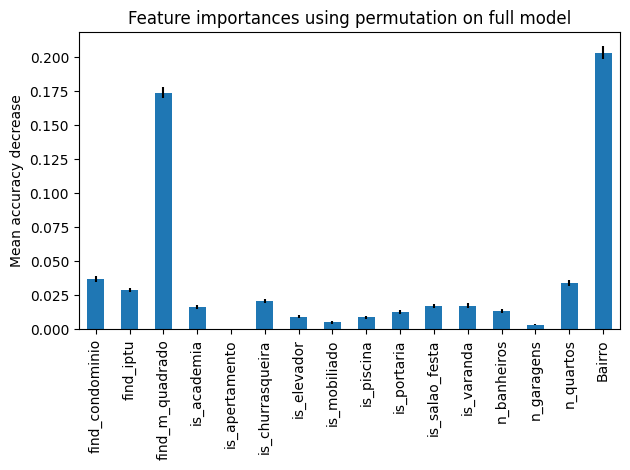

In [47]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

result = permutation_importance(rf, X_pequeno, y_pequeno, n_repeats=100, random_state=0)

forest_importances = pd.Series(result.importances_mean, index=X.columns)

fig, ax = plt.subplots()

forest_importances.plot.bar(yerr=result.importances_std, ax=ax)

ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

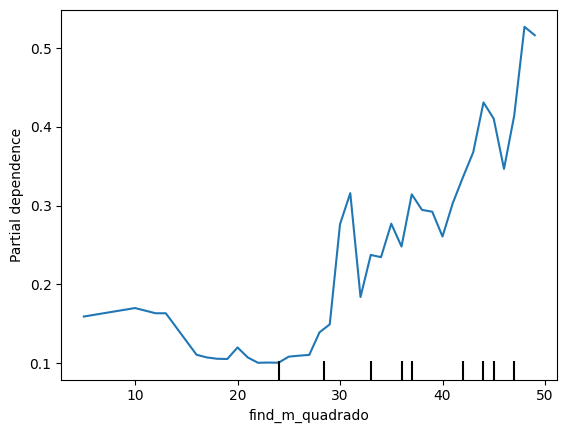

In [48]:
from sklearn.inspection import PartialDependenceDisplay

display  = PartialDependenceDisplay.from_estimator(rf, X_pequeno, [2])

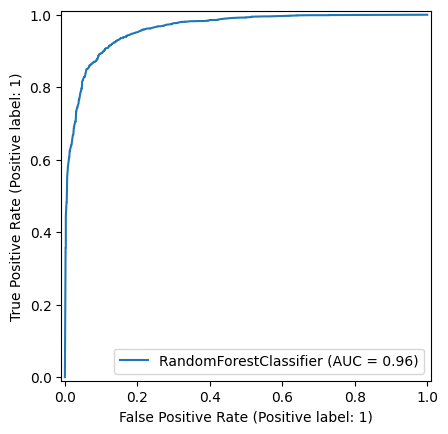

In [58]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(rf, X_test, y_test)

C:\Users\davim\AppData\Local\Temp\ipykernel_19620\3420713456.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rf.predict_proba(X_test))


<Axes: ylabel='Density'>

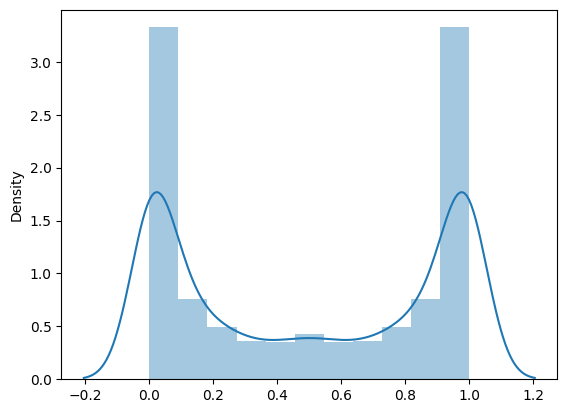

In [62]:
import seaborn as sns
sns.distplot(rf.predict_proba(X_test))

In [77]:
X_test['score'].mean()

KeyError: 'score'

In [85]:
X_test['score'].describe()

count    4000.000000
mean        0.386915
std         0.395060
min         0.000000
25%         0.010000
50%         0.203464
75%         0.820625
max         1.000000
Name: score, dtype: float64

In [88]:
rf.predict(X_test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- score


In [91]:

X_test = X_test.drop(columns=['score'])

X_test['score'] = rf.predict_proba(X_test)[:,0]

y_pred_dificil = y_pred[(X_test['score']>0.1) & (X_test['score']<0.6)]

Y_test_dificil = y_test[(X_test['score']>0.1) & (X_test['score']<0.6)]

accuracy_score(y_pred_dificil, Y_test_dificil)

0.6166832174776564

# APAGAR ESSA PARTE DEPOIS:

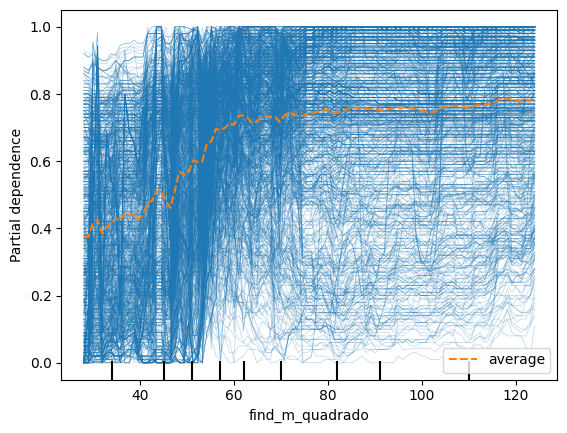

In [56]:
disp1 = PartialDependenceDisplay.from_estimator(rf, X_test, ['find_m_quadrado'], kind='both')

In [50]:
# Importância das características
importances = rf.feature_importances_
feature_names = X.columns.tolist()
# Mostrar as importâncias
for feature, importance in zip(feature_names, importances):
    print(f"Feature: {feature}, Importance: {importance}")

Feature: find_condominio, Importance: 0.10360163661477254
Feature: find_iptu, Importance: 0.09702966397715923
Feature: find_m_quadrado, Importance: 0.3287165826921294
Feature: is_academia, Importance: 0.01899146161805833
Feature: is_apertamento, Importance: 0.005847705690402606
Feature: is_churrasqueira, Importance: 0.014866310939998293
Feature: is_elevador, Importance: 0.01316245228983987
Feature: is_mobiliado, Importance: 0.00786370224341196
Feature: is_piscina, Importance: 0.02287438440687135
Feature: is_portaria, Importance: 0.0146611953856236
Feature: is_salao_festa, Importance: 0.016356130922281206
Feature: is_varanda, Importance: 0.01646571838431203
Feature: n_banheiros, Importance: 0.03190689084610722
Feature: n_garagens, Importance: 0.059672116335676914
Feature: n_quartos, Importance: 0.09020689171630622
Feature: Bairro, Importance: 0.15777715593704922


In [51]:
list(X_test.columns)

['find_condominio',
 'find_iptu',
 'find_m_quadrado',
 'is_academia',
 'is_apertamento',
 'is_churrasqueira',
 'is_elevador',
 'is_mobiliado',
 'is_piscina',
 'is_portaria',
 'is_salao_festa',
 'is_varanda',
 'n_banheiros',
 'n_garagens',
 'n_quartos',
 'Bairro']

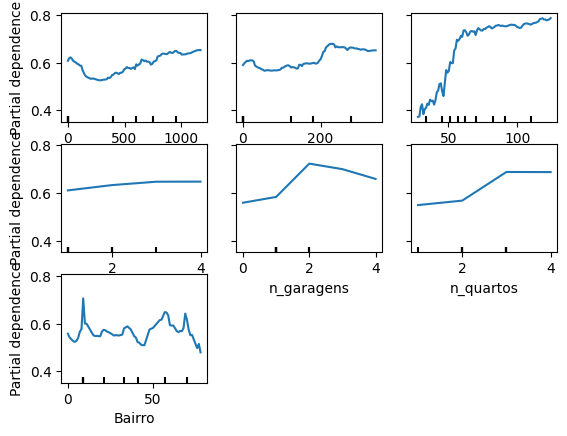

In [52]:
from sklearn.inspection import PartialDependenceDisplay

features = [0,1,2,12,13,14,15]

display  = PartialDependenceDisplay.from_estimator(rf, X_test, features)

In [53]:
disp1 = PartialDependenceDisplay.from_estimator(rf, X_test, [[1,5,7]],grid_resolution=20, target=[1])

ValueError: Each entry in features must be either an int, a string, or an iterable of size at most 2.

In [ ]:
disp1 = PartialDependenceDisplay.from_estimator(rf, X_test, [1], kind='both', target=[1])

In [ ]:
from sklearn.decomposition import PCA

# Step 2: Perform PCA
pca = PCA(n_components=2)  # Number of components to keep
principal_components = pca.fit_transform(df_2)

# Create a DataFrame with the principal components
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Step 3: Analyze the results
explained_variance = pca.explained_variance_ratio_

print("Principal Components DataFrame:")
print(pc_df)
print("\nExplained Variance Ratio:")
print(explained_variance)

Gostariamos também de entender relações bivariadas, uma casa com elevador

In [ ]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

result = permutation_importance(mlp, X_test, y_test ,n_repeats=100, random_state=0)

forest_importances = pd.Series(result.importances_mean, index=X.columns)

fig, ax = plt.subplots()

forest_importances.plot.bar(yerr=result.importances_std, ax=ax)

ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()